In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X=2*np.random.rand(100, 1)
y=6+4*X+np.random.randn(100, 1)

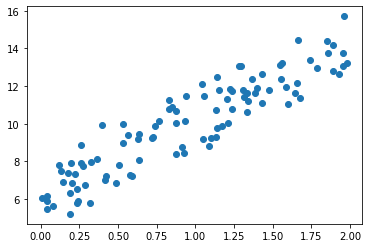

In [4]:
plt.scatter(X, y)

In [5]:
def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred)/N)
    return cost

In [9]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X, w1.T)+w0
    diff=y-y_pred

    w0_factors=np.ones((N, 1))
    
    w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update=-(2/N)*learning_rate*np.dot(w0_factors.T, diff)

    return w1_update, w0_update

In [10]:
def gradient_descent_steps(X, y, iters=10000):
    w0=np.zeros((1, 1))
    w1=np.zeros((1, 1))

    for ind in range(iters):
        w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1, w0

In [11]:
w1, w0=gradient_descent_steps(X, y, iters=1000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred=w1[0, 0]*X+w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


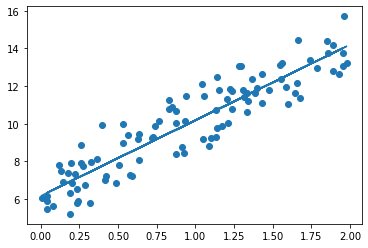

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0=np.zeros((1, 1))
    w1=np.zeros((1, 1))
    prev_cost=10000
    iter_index=0

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1, w0

In [14]:
w1, w0=stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 : ', round(w1[0, 0], 3), 'w0 : ', round(w0[0, 0], 3))
y_pred=w1[0, 0]*X+w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 :  4.028 w0 :  6.156
Stochastic Gradient Descent Total Cost : 0.9937


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
df=pd.read_csv('./auto-mpg.csv')
df.columns=['mpg','cylinders','displacement','horsepower','weight','accerlation','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,accerlation,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [17]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')

In [18]:
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
0,15.0,8,165.0,3693.0
1,18.0,8,150.0,3436.0
2,16.0,8,150.0,3433.0
3,17.0,8,140.0,3449.0
4,15.0,8,198.0,4341.0
...,...,...,...,...
392,27.0,4,86.0,2790.0
393,44.0,4,52.0,2130.0
394,32.0,4,84.0,2295.0
395,28.0,4,79.0,2625.0


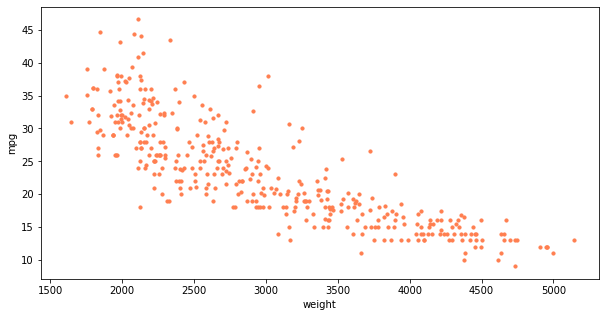

In [19]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

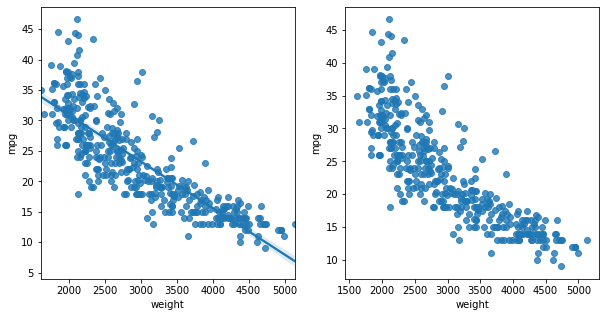

In [20]:
fig=plt.figure(figsize=(10, 5))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()

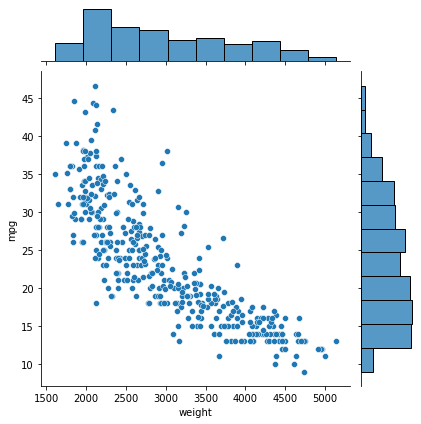

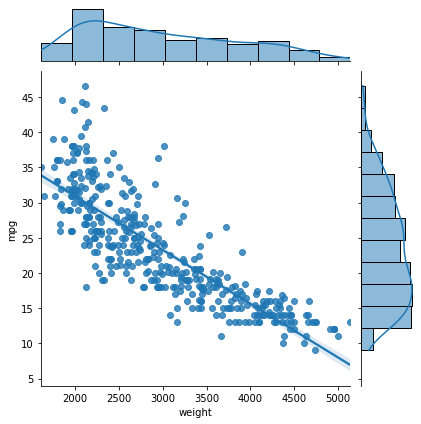

In [21]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

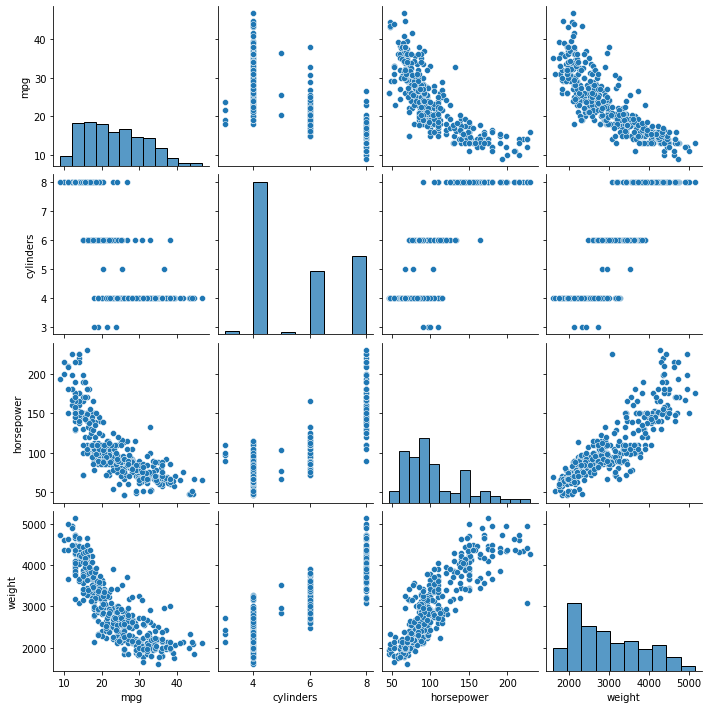

In [22]:
sns.pairplot(ndf)
plt.show()
plt.close()

In [23]:
X=ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
print('train_data 개수 : ', len(X_train))
print('test_data 개수 : ', len(X_test))

train_data 개수 :  273
test_data 개수 :  118


In [24]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)
r_square=lr.score(X_test, y_test)
print(r_square)
print('\n')
print('기울기 a : ', lr.coef_)
print('\n')
print('y절편 b : ', lr.intercept_)
print('\n')

0.7035812683047353


기울기 a :  [-0.00770318]


y절편 b :  46.603926171480815




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


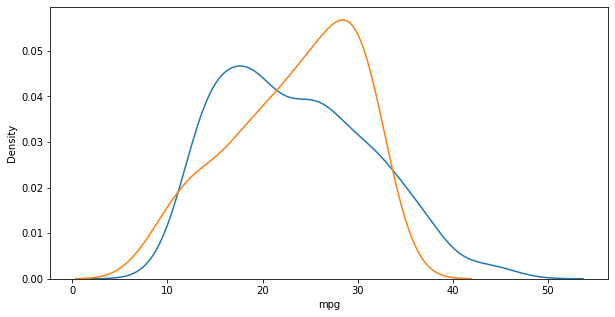

In [25]:
y_hat=lr.predict(X_test)
plt.figure(figsize=(10, 5))
ax1=sns.distplot(y, hist=False, label='y')
ax2=sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

In [26]:
df=pd.read_csv('./auto-mpg.csv')
df.columns=['mpg','cylinders','displacement','horsepower','weight','accerlation','model year','origin','name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')

ndf=df[['mpg','cylinders','horsepower','weight']]

X=ndf[['weight', 'cylinders', 'horsepower']]
y=ndf['mpg']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
print('train_data 개수 : ', X_train.shape)
print('test_data 개수 : ', X_test.shape)

train_data 개수 :  (273, 3)
test_data 개수 :  (118, 3)


In [27]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.7187012273294773


기울기 a :  [-0.00507452 -0.56850996 -0.0422319 ]


y절편 b :  46.28267147300808




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


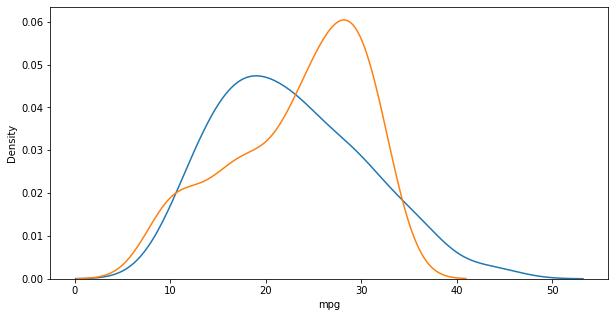

In [28]:
r_square=lr.score(X_test, y_test)
print(r_square)
print('\n')
print('기울기 a : ', lr.coef_)
print('\n')
print('y절편 b : ', lr.intercept_)
print('\n')

y_hat=lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1=sns.distplot(y_test, hist=False, label='y_test')
ax2=sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

In [29]:
from scipy import stats
from sklearn.datasets import load_boston

boston=load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
print('Boston 데이터셋 크기 : ', bostonDF.shape)
bostonDF

Boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


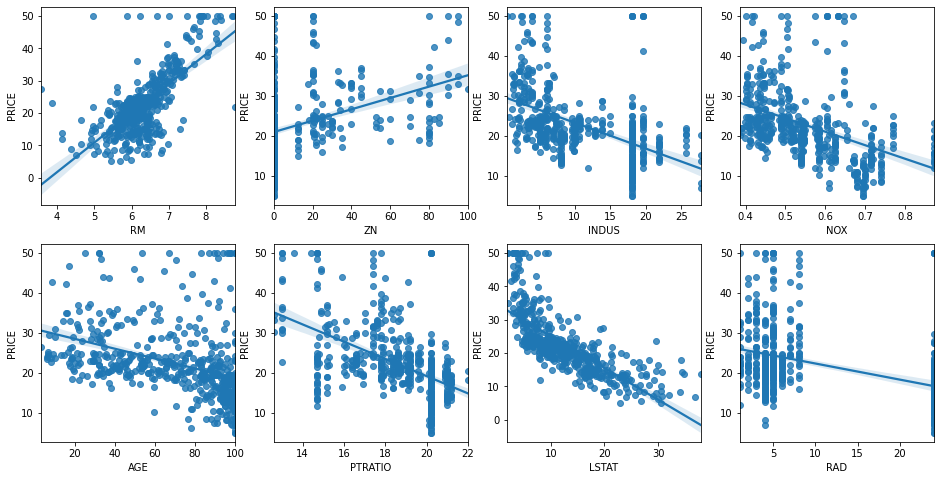

In [30]:
fig, axs=plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [32]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164755
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [33]:
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [34]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [35]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [36]:
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    print(X[:,0])
    print(X[:,1])
    return y

In [37]:
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : ', poly_ftr)
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n : ', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature :  [[1.000000e+00 3.693000e+03 8.000000e+00 ... 1.056000e+04 2.178000e+05
  4.492125e+06]
 [1.000000e+00 3.436000e+03 8.000000e+00 ... 9.600000e+03 1.800000e+05
  3.375000e+06]
 [1.000000e+00 3.433000e+03 8.000000e+00 ... 9.600000e+03 1.800000e+05
  3.375000e+06]
 ...
 [1.000000e+00 2.295000e+03 4.000000e+00 ... 1.344000e+03 2.822400e+04
  5.927040e+05]
 [1.000000e+00 2.625000e+03 4.000000e+00 ... 1.264000e+03 2.496400e+04
  4.930390e+05]
 [1.000000e+00 2.720000e+03 4.000000e+00 ... 1.312000e+03 2.689600e+04
  5.513680e+05]]
Polynomial 회귀 계수
 :  [ 0.000e+00  2.000e-02  2.152e+01 -1.130e+00  0.000e+00 -0.000e+00
 -0.000e+00 -7.220e+00  4.200e-01  0.000e+00  0.000e+00 -0.000e+00
  0.000e+00  0.000e+00 -0.000e+00  0.000e+00  2.300e-01 -3.000e-02
 -0.000e+00 -0.000e+00]
Polynomial 회귀 Shape :  (20,)


In [38]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

model=Pipeline([('poly',PolynomialFeatures(degree=3)), ('linear',LinearRegression())])
X=np.arange(4).reshape(-2, 2)
y=polynomial_func(X)
model=model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [40]:
df=pd.read_csv('./auto-mpg.csv')
df.columns=['mpg','cylinders','displacement','horsepower','weight','accerlation','model year','origin','name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')

In [41]:
ndf=df[['mpg','cylinders','horsepower','weight']]

X=ndf[['weight']]
y=ndf['mpg']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)

In [43]:
pr=LinearRegression()
pr.fit(X_train_poly, y_train)
X_test_poly=poly.fit_transform(X_test)
r_square=pr.score(X_test_poly, y_test)
print(r_square)
print('\n')

0.7337822241594376




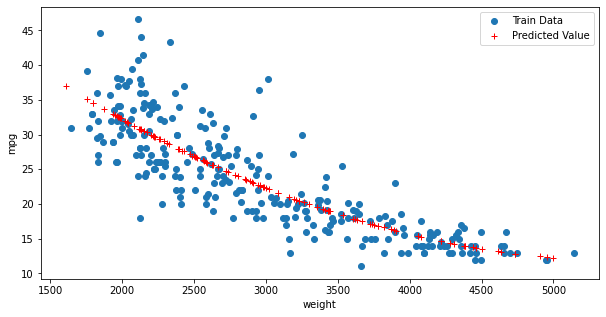

In [44]:
y_hat_test=pr.predict(X_test_poly)

fig=plt.figure(figsize=(10, 5))
ax=fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


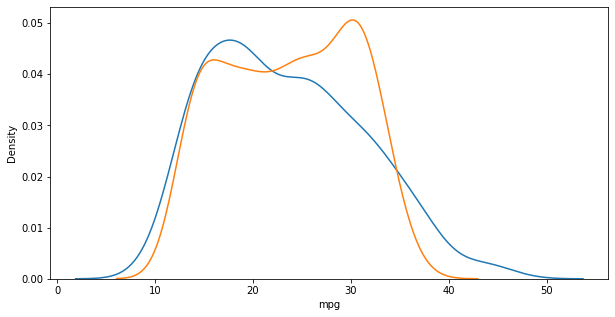

In [45]:
X_poly=poly.fit_transform(X)
y_hat=pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1=sns.distplot(y, hist=False, label='y')
ax2=sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

In [46]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))
y=true_fun(X)+np.random.rand(n_samples)*0.1

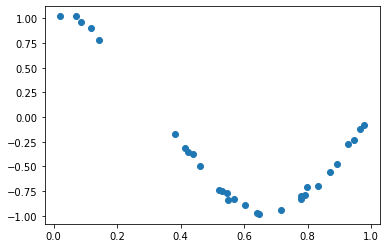

In [47]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.]입니다.
Degree1 MSE 는 0.39입니다.

Degree 4 회귀 계수는 [  2. -23.  32. -11.]입니다.
Degree4 MSE 는 0.01입니다.

Degree 15 회귀 계수는 [ 1.20000000e+02 -3.59900000e+03  5.21450000e+04 -4.14476000e+05
  1.80867800e+06 -3.37986500e+06 -6.02709100e+06  5.58447810e+07
 -1.69828864e+08  3.08632406e+08 -3.68969166e+08  2.93849505e+08
 -1.50697398e+08  4.51479600e+07 -6.01513600e+06]입니다.
Degree15 MSE 는 42927389.73입니다.


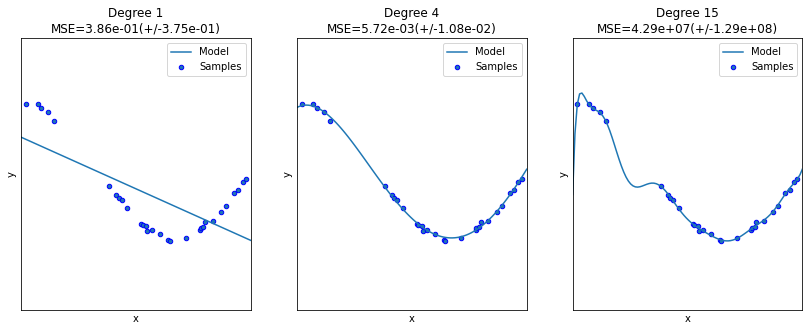

In [48]:
plt.figure(figsize=(14, 5))
degrees=[1, 4, 15]

for i in range(len(degrees)):
    ax=plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    scores=cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients), 2))
    print('Degree{0} MSE 는 {1:.2f}입니다.'.format(degrees[i], -1*np.mean(scores)))

    X_test=np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x');plt.ylabel('y');plt.xlim((0, 1));plt.ylim((-2, 2));plt.legend(loc='best')
    plt.title('Degree {0}\nMSE={1:.2e}(+/-{2:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [ ]:
fig=plt.figure(figsize=(12, 10))
plt.style.use('seaborn-whitegrid')

for i, degree in enumerate([1,4,15], start=1):
    ax=fig.add_subplot(2, 2, 1)
    ax.scatter(X, y, s=15)
    y_test=Pipeline([('Poly', PolynomialFeatures(degree)),('linear',LinearRegression())]).fit(X,y).predict(X_test)
    ax.plot(X_test, y_test, label='degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best')